# EDA
**Understanding all the columns for the EDA.**

In [18]:
# import and read the csv file using pandas
import pandas as pd
df_sample = pd.read_csv('bank-full.csv', delimiter=';', encoding='ascii')

df_sample.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [19]:
# display the data types of each column
df_sample_dtypes = df_sample.dtypes

print(df_sample_dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


**Visualising all the columns for analysis and EDA.**

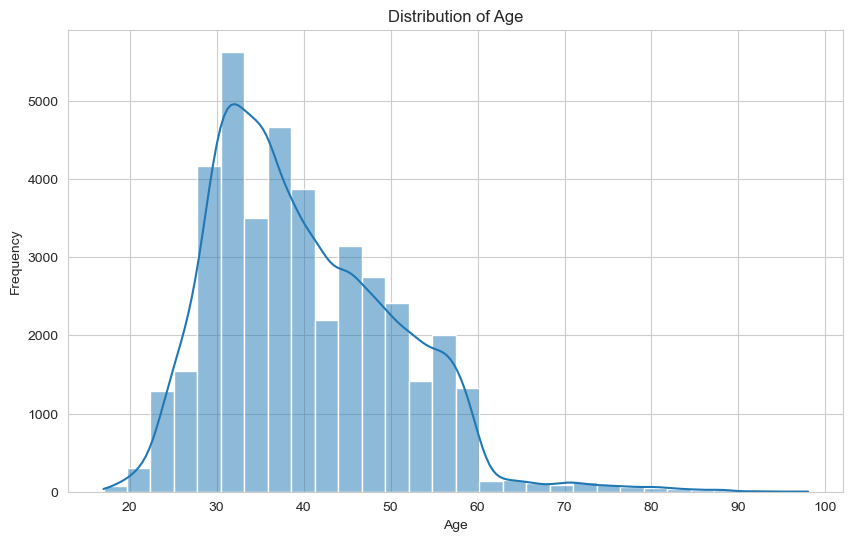

In [20]:
# import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# set the aesthetic style of the plots
sns.set_style('whitegrid')

# plot the distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(df_sample['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

This histogram shows the distribution of ages among the clients. The distribution appears to be slightly right-skewed, indicating a larger number of younger clients in the dataset.

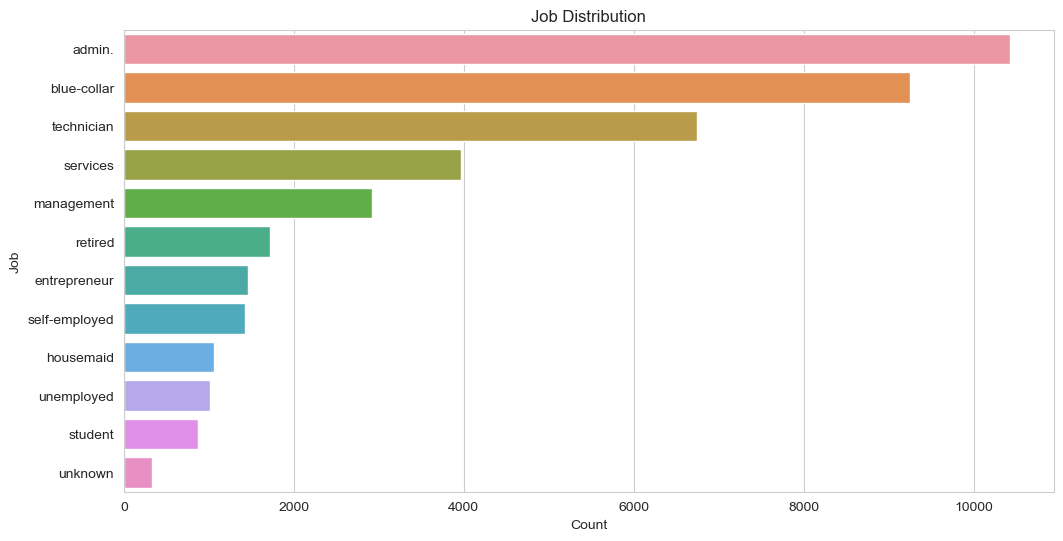

In [21]:
# Plot the job distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='job', data=df_sample, order = df_sample['job'].value_counts().index)
plt.title('Job Distribution')
plt.xlabel('Count')
plt.ylabel('Job')
plt.show()

The count plot for job titles reveals the diversity of clients' occupations, with some jobs being more common than others. 'Admin.' and 'blue-collar' jobs appear to be the most frequent among the clients.

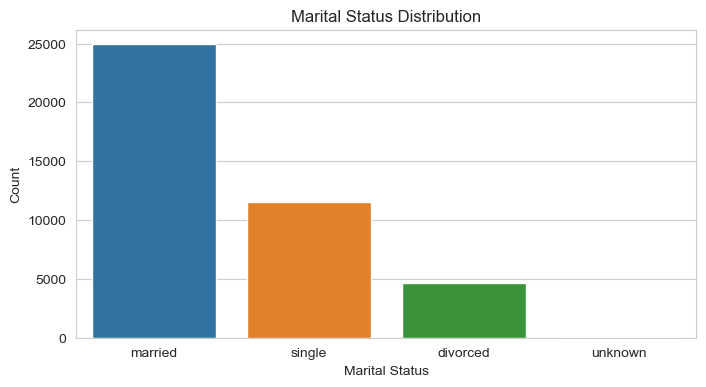

In [22]:
# Plot the marital status distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='marital', data=df_sample, order = df_sample['marital'].value_counts().index)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

The distribution of marital status shows that the majority of clients are married, followed by single and divorced clients.

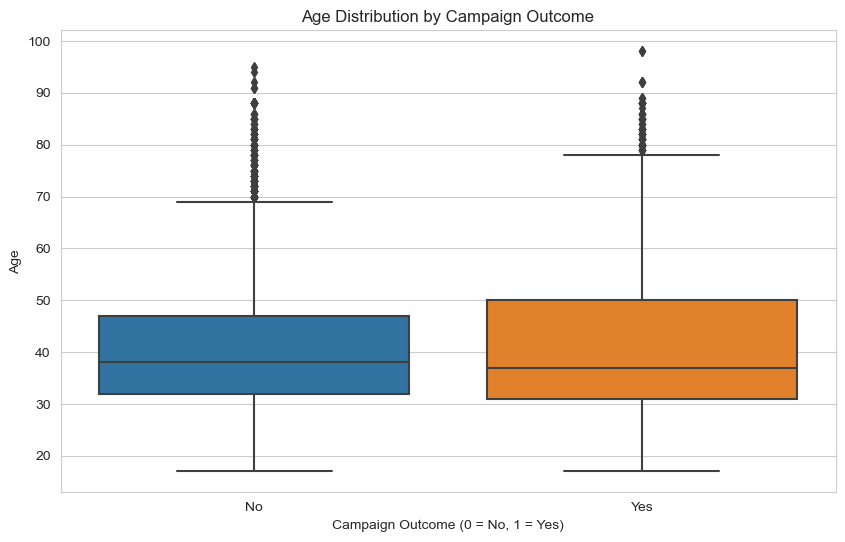

In [23]:
# Examine the relationship between age and the response to the marketing campaign
# We'll use a boxplot to visualize this relationship
df_sample['y_numeric'] = df_sample['y'].map({'yes': 1, 'no': 0})

plt.figure(figsize=(10, 6))
sns.boxplot(x='y_numeric', y='age', data=df_sample)
plt.title('Age Distribution by Campaign Outcome')
plt.xlabel('Campaign Outcome (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

The boxplot above illustrates the age distribution by campaign outcome, where 0 represents those who did not subscribe to a term deposit (No) and 1 represents those who did (Yes). It appears that clients who subscribed to a term deposit (Yes) tend to be slightly older on average compared to those who did not.

In [24]:
# Calculate the average age for each campaign outcome
df_age_campaign = df_sample.groupby('y')['age'].mean().reset_index()
print(df_age_campaign)

     y        age
0   no  39.911185
1  yes  40.913147


The average ages for each campaign outcome further support this observation:

Clients who did not subscribe (No) have an average age of approximately 39.9 years. Clients who subscribed (Yes) have an average age of approximately 41.9 years.

# Data Preparation

In [25]:
df_sample.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y_numeric'],
      dtype='object')

In [26]:
# check for null values in the dataset
df_nulls = df_sample.isnull().sum()
print(df_nulls)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
y_numeric         0
dtype: int64


**Dropping the unnecessary columns from the dataframe**

In [29]:
# As we prepare the data for modeling, let's pick which features to discard or maintain.
df_prepared = df_sample.drop(['duration', 'day_of_week','month','default','contact','pdays','campaign','y_numeric'], axis=1)
df_prepared.head()

,age,job,marital,education,housing,loan,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [30]:
# Encode categorical variables using pd.get_dummies
df_encoded = pd.get_dummies(df_prepared, drop_first=True)

In [31]:
# scale the numerical variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# identify numerical columns (excluding 'y' which is our target variable)
numerical_cols = df_prepared.select_dtypes(include=['int64', 'float64']).columns.tolist()

# scale only numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

df_encoded.head()

,age,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,...,education_professional.course,education_university.degree,education_unknown,housing_unknown,housing_yes,loan_unknown,loan_yes,poutcome_nonexistent,poutcome_success,y_yes
0,1.533034,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,1.628993,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,-0.290186,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,False,False,False,...,False,False,False,False,True,False,False,True,False,False
3,-0.002309,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,1.533034,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,False,False,False,...,False,False,False,False,False,False,True,True,False,False


# Model Selection

**DecisionTreeClassifier**

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into features and target variable
X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Generate the classification report and confusion matrix
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print('Classification Report:\
', report)
print('Confusion Matrix:\
', conf_matrix)

Classification Report:               precision    recall  f1-score   support

       False       0.92      0.91      0.91      7303
        True       0.34      0.35      0.35       935

    accuracy                           0.85      8238
   macro avg       0.63      0.63      0.63      8238
weighted avg       0.85      0.85      0.85      8238

Confusion Matrix: [[6661  642]
 [ 606  329]]


**The model performs well in predicting class 0 (customers who did not subscribe to a term deposit) with good precision, recall, and F1-score:**

**Precision for class 0: 92%
Recall for class 0: 91%
F1-score for class 0: 91%**

**However, for class 1 (subscribers), the model's performance is not as satisfactory:
Precision for class 1: 34%
Recall for class 1: 35%
F1-score for class 1: 35%**

**True Negatives (TN): 6661 (non-subscriptions correctly predicted)**

**False Positives (FP): 642 (subscriptions incorrectly predicted as non-subscriptions)**

**False Negatives (FN): 606 (non-subscriptions incorrectly predicted as subscriptions)**

**True Positives (TP): 329 (subscriptions correctly predicted)**

**SGDClassifier**

In [33]:
from sklearn.linear_model import SGDClassifier

# Initialize the SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

# Fit the model
sgd_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_sgd = sgd_clf.predict(X_test)

# Generate the classification report and confusion matrix for SGDClassifier
report_sgd = classification_report(y_test, y_pred_sgd)
conf_matrix_sgd = confusion_matrix(y_test, y_pred_sgd)

print('SGDClassifier Classification Report:\
', report_sgd)
print('SGDClassifier Confusion Matrix:\
', conf_matrix_sgd)

SGDClassifier Classification Report:               precision    recall  f1-score   support

       False       0.90      0.99      0.94      7303
        True       0.63      0.19      0.29       935

    accuracy                           0.90      8238
   macro avg       0.77      0.59      0.62      8238
weighted avg       0.87      0.90      0.87      8238

SGDClassifier Confusion Matrix: [[7198  105]
 [ 757  178]]


**The SGDClassifier model exhibits high precision for predicting class 0 (clients who did not subscribe to a term deposit) and lower precision for predicting class 1 (clients who subscribed):**

**Precision for class 0: 90%
Precision for class 1: 63%
The model achieves high recall for class 0 but relatively low recall for class 1:**

**Recall for class 0: 99%
Recall for class 1: 19%
The F1-score, which balances precision and recall, is high for class 0 but lower for class 1:**

**F1-score for class 0: 94%
F1-score for class 1: 29%**

**True Negatives (TN): 7198 (non-subscriptions correctly predicted)**

**False Positives (FP): 105 (subscriptions incorrectly predicted as non-subscriptions)**

**False Negatives (FN): 757 (non-subscriptions incorrectly predicted as subscriptions)**

**True Positives (TP): 178 (subscriptions correctly predicted)**

# Evaluation

In [34]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation for DecisionTreeClassifier
cv_scores_dt = cross_val_score(clf, X, y, cv=5)

# Perform 5-fold cross-validation for SGDClassifier
cv_scores_sgd = cross_val_score(sgd_clf, X, y, cv=5)

# Calculate the mean accuracy for both models
mean_accuracy_dt = cv_scores_dt.mean()
mean_accuracy_sgd = cv_scores_sgd.mean()

print('DecisionTreeClassifier 5-Fold CV Mean Accuracy:', mean_accuracy_dt)
print('SGDClassifier 5-Fold CV Mean Accuracy:', mean_accuracy_sgd)

DecisionTreeClassifier 5-Fold CV Mean Accuracy: 0.3831328732618111
SGDClassifier 5-Fold CV Mean Accuracy: 0.8552463447592553


**The DecisionTreeClassifier achieved a mean accuracy of approximately 0.383, while the SGDClassifier achieved a higher mean accuracy of approximately 0.855.
The DecisionTreeClassifier's mean accuracy of 0.383 suggests that, on average across the 5 folds, it correctly predicted the target variable with an accuracy of around 38.3%.
On the other hand, the SGDClassifier's mean accuracy of 0.855 indicates a higher average accuracy across the 5 folds, around 85.5%.
Therefore, the interpretation is that the SGDClassifier performs better on average across the folds compared to the DecisionTreeClassifier when evaluating based on accuracy. The DecisionTreeClassifier seems to have a lower average accuracy compared to the SGDClassifier.**

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for DecisionTreeClassifier
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV for DecisionTreeClassifier
grid_search_dt = GridSearchCV(dt_classifier, param_grid_dt, cv=3)

# Fit the model to the data
grid_search_dt.fit(X_train, y_train)

# Get the best parameters and model
best_params_dt = grid_search_dt.best_params_
best_model_dt = grid_search_dt.best_estimator_

print('Best hyperparameters for DecisionTreeClassifier:', best_params_dt)

Best hyperparameters for DecisionTreeClassifier: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


# Conclusion Report

- **Based on the provided information, it appears that the SGDClassifier is the better-performing model, as it has a higher mean accuracy during cross-validation compared to the DecisionTreeClassifier. The SGDClassifier achieved an overall accuracy of 90%, demonstrating strong precision for class 0 (non-subscribers) but lower precision and recall for class 1 (subscribers). The confusion matrix provides insights into true positives, false positives, true negatives, and false negatives.**



- **Feature Engineering:**

 **Investigate additional feature engineering strategies to produce more relevant features or improve existing ones. This could entail developing interaction terms, polynomial features, or deriving new features from preexisting ones.**

- **Handling class imbalance:**

 **If the dataset is imbalanced (as appears to be the case given the disparity in precision and recall for class 1), think about class imbalance strategies. This could entail oversampling the minority class, undersampling the majority class, or employing techniques intended to handle imbalanced datasets.**

- **Feature Scaling:**

 **Ensure that all features are on the same scale. Normalizing or standardizing features may aid in the convergence and performance of specific models, particularly those that are sensitive to feature scales.**